
## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

In [195]:
import numpy as np
import re
import pandas as pd
df = pd.read_csv('Resume.csv')

def preprocess_text(string):
    pre_string = string.strip()

    pre_string = re.sub(r'(\s{6,})', ' newlineeeee ', pre_string)
    pre_string = pre_string.split('newlineeeee')
    return pre_string

df['Resume_str_list'] = df['Resume_str'].apply(lambda x: preprocess_text(x) )

#POSITION_TITLE
def position_title(string):
    if len(string[0])>200:
        mystring = string[0].split('\n')
        try:
            return mystring[1]
        except:
            return mystring[0]

    elif len(string[0].strip())<3:
        try:
            title  = string[1].strip()
        except:
            title = string[0]
    else:
        title = string[0].replace('\n', ' ').replace('\t', '')
    return title

df['POSITION_TITLE'] = df['Resume_str_list'].apply(lambda x : position_title(x))

#SKILLS , SKILLS_COUNTS
def extracting_skills(string):
    myskills = []
    for i, j in enumerate(string):
        text=j.strip()
        text=text.lower()
        if text.startswith('skills')  or text.startswith('technical skills') or text.startswith('computer skills') or text.startswith('additional skills') :
            myskills.append(j)

        if text=='skills     ·' or text=='skills' or text=='skill highlights' or text=='computer skills' or text=='technical skills' or text=='summary of skills' or text=='skills & competencies' or text=='key skills' or text=='additional skills':
            try:
                myskills.append(string[i+1])
            except:
                pass
            
    return ' '.join(myskills).replace('\n', ' ').replace('\t', '')

df['SKILLS'] = df['Resume_str_list'].apply(lambda x: extracting_skills(x) )

def counting_skills(string):
    if string == '':
        return 0
    else:
        string = string.replace('    ', ',').replace('   ', ',').replace('  ', ',')
        number_skills = string.split(r',')
    
        number_skills_asWords = int(number_skills.count('skills')) + int(number_skills.count('Skills')) 
        return len(number_skills)-number_skills_asWords

df['SKILLS_COUNT'] = df['SKILLS'].apply(lambda x: counting_skills(x) )

#Driving License
def driving_license(string):
    string = string.replace('\n', ' ').replace('\t', '')
    if 'drivers license' in string.lower() or "driver's license" in string.lower() or 'driving license' in string.lower() or 'driver license' in string.lower() or 'driving licence' in string.lower():
        return int(1)
    else:
        return int(0)

df['DRIVERS_LICENSE_AVAILABILITY'] = df['Resume_str'].apply(lambda x: driving_license(x) )

#Languages
language = [' afrikaans', ' albanian', ' amharic', ' arabic', ' armenian', ' assamese', ' aymara', ' azerbaijani', ' bambara', ' basque', ' belarusian', ' bengali', ' bhojpuri', ' bosnian', ' bulgarian', ' catalan', ' cebuano', ' chichewa', ' chinese', ' corsican', ' croatian', ' czech', ' danish', ' dhivehi', ' dogri', ' dutch', ' english', ' esperanto', ' estonian', ' filipino', ' finnish', ' french', ' frisian', ' galician', ' georgian','dari,' ,' german,', 'cyrillic',' greek', ' guarani', ' gujarati', ' haitian creole', ' hausa', ' hawaiian', ' hebrew', ' hindi', ' hmong', ' hungarian', ' icelandic', ' igbo', ' ilocano', ' indonesian', ' irish', ' italian', ' japanese', ' javanese', ' kannada', ' kazakh', ' khmer', ' kinyarwanda', ' konkani', ' korean', ' krio', ' kurdish', ' kurdish ', ' kyrgyz,', ' lao', ' latin', ' latvian', ' lingala', ' lithuanian', ' luganda', ' luxembourgish', ' macedonian', ' maithili', ' malagasy', ' malay', ' malayalam', ' maltese', ' maori', ' marathi', ' meiteilon', ' mizo', ' mongolian', ' myanmar', '  nepali', ' norwegian', ' odia', ' oromo', ' pashto', ' persian', ' polish', ' portuguese', ' punjabi', ' quechua', ' romanian', ' russian', ' samoan', ' sanskrit', ' scots gaelic', ' sepedi', ' serbian', ' sesotho', ' shona', ' sindhi', ' sinhala', ' slovak', ' slovenian', ' somali', ' spanish', ' sundanese', ' swahili', ' swedish', ' tajik', ' tamil', ' tatar', ' telugu', ' thai,',' thai ', ' tigrinya', ' tsonga', ' turkish', ' turkmen', ' ukrainian', ' urdu', ' uyghur', ' uzbek ', ' uzbek,', ' vietnamese', ' welsh', ' xhosa', ' yiddish', ' yoruba', ' zulu' , 'isixhosa','isizulu' ]
def count_languages(string):
    count = 0
    for i in language:
        if i in string.lower():
            count = count +1 
    return count

df['Languages'] = df['Resume_str'].apply(lambda x: count_languages(x) )

#COMMUNITY SERVICE
df['COMMUNITY SERVICE'] = df['Resume_str'].apply(lambda x: int(1) if  'community service' in x.lower() else int(0) )

#VOLUNTEERING
df['VOLUNTEERING'] = df['Resume_str'].apply(lambda x: int(1) if  'volunteer' in x.lower() else int(0) )

#Awords
def awards(string):
    if 'award' in string.lower() or 'prize' in string.lower():
        return int(1)
    else:
        return int(0)
df['AWARDS'] = df['Resume_str'].apply(lambda x: awards(x) )

#EXPERIENCE_LENGTH
def experience_length(string_list):
    a='none'
    yearRange = range(1975, 2025)
    experience=[]
    for i in string_list:
        ii = i.strip().lower()
        years1=re.findall(r'\D(\d{4})\D',ii)
        years2=re.findall(r'\D(\d{4})$',ii)
        years = years1+years2
        if len(years)==2:
            if int(years[1]) in yearRange and int(years[0]) in yearRange:
                experience.append(int(years[1])-int(years[0]))
        elif len(years)==1 and 'current' in ii:
            if int(years[0]) in yearRange:
                experience.append(2024-int(years[0]))
    
    return np.abs(sum(experience))

df['EXPERIENCE_LENGTH'] = df['Resume_str_list'].apply(lambda x: experience_length(x) )

#SCHOOL_TYPE
schools = ['university', 'college', 'high school']
def school_type(string):
    school = 'not mentioned'
    for i in schools:
        if i in string.lower():
            school = i
            break
    return school
df['SCHOOL_TYPE'] = df['Resume_str'].apply(lambda x: school_type(x) )

#EDUCATION_TYPE
schools = ['phd', 'ph.d', 'master',' mba ' , 'bachelor', 'associate of science' ,'associate of arts','associates of applied science' ,'associate of applied science' ,   'business administration',  'diploma', ' ba ' , ' b.a ', ' bas ', ' b.s ', ' bsc ', 'bsc.', 'associate degree' ,'associates degree' ,  ' aa ' , ' bba ' , ' bfa '  , ' bs ' , ' be ', ' b.e ', ' M.S ',  ]
def education_type(string):
    school = 'not mentioned'
    for i in schools:
        if i in string.lower():
            school = i.upper()
            break
    if school =='not mentioned':
        if ' AS ' in string:
            school = 'AS'
    return school

df['EDUCATION_TYPE'] = df['Resume_str'].apply(lambda x: education_type(x) )
new_data = {' B.S ': 'BACHELOR' , ' MBA ': 'MASTER' , ' B.S ': 'BACHELOR' , ' B.A ': 'BACHELOR' , ' BA ': 'BACHELOR' , ' BE ': 'BACHELOR' , ' BS ': 'BACHELOR' , 'PH.D':'PHD', 'BSC.': 'BACHELOR' , ' BFA ': 'BACHELOR' ,' BSC ': 'BACHELOR' , 'ASSOCIATES OF APPLIED SCIENCE':'ASSOCIATE OF APPLIED SCIENCE' , 'ASSOCIATES DEGREE':'ASSOCIATE DEGREE' ,' B.E ': 'BACHELOR' , 'AS': 'ASSOCIATE OF SCIENCE' , ' BBA ': 'BACHELOR' , ' AA ':'ASSOCIATE DEGREE'}
df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].replace(to_replace= new_data)

#QUALIFICATIONS
def qualification(string_list):
    summary = ''
    highlights = ''
    accomplishments = ''
    qualifications = ''

    for index, i in enumerate(string_list):
        i_lower = i.split('\n')[0]
        i_lower = i_lower.strip().lower()

        
        if i_lower.startswith('summary'):
            if len(i_lower.split(' '))<3:
                summary = 'Summary: '+' '.join(string_list[index+1].split('summary')).strip()
            else:
                summary = 'Summary: '+' '.join(i_lower.split('summary')).strip()
            
        if i_lower.startswith('highlight'):
            if len(i_lower.split(' '))<3:
                highlights = 'Highlights: '+' '.join(string_list[index+1].split('highlights')).strip()
            else:
                highlights = 'Highlights: '+' '.join(i_lower.split('highlights')).strip()

        if i_lower.startswith('accomplishment'):
            if len(i_lower.split(' '))<3:
                accomplishments = 'Accomplishments: '+' '.join(string_list[index+1].split('accomplishments')).strip()
            else:
                accomplishments = 'Accomplishments: '+' '.join(i_lower.split('accomplishments')).strip()
            
        if i_lower.startswith('qualification'):
            if len(i_lower.split(' '))<3:
                try:
                    qualifications = 'Qualifications: '+' '.join(string_list[index+1].split('qualifications')).strip()
                    # return qualifications
                except:
                    qualifications = 'Qualifications: '+' '.join(i_lower.split('qualifications')).strip()
                    # return qualifications
            else:
                qualifications = 'Qualifications: '+' '.join(i_lower.split('qualifications')).strip()
            
    # return highlights
    return (summary + ' ' +highlights + ' ' + accomplishments  + ' ' +qualifications)
    
df['QUALIFICATIONS'] = df['Resume_str_list'].apply(lambda x : qualification(x))
df['QUALIFICATIONS'] = df['QUALIFICATIONS'].apply(lambda x: re.sub(r'\s{2,6}', ' ', x))

#EDUCATION_MAJOR
def textStartfromEducation(string):
    for i, j in enumerate(string):
        j=j.strip().lower()
        if j.startswith('education'):
            text = ' '.join(string[i-1:])
            return text.lower()
        else:
            return string

df['education'] = df['Resume_str'].apply(lambda x : textStartfromEducation(x))

def majors2(string):
    major = ''
    for i in majors_list:
        if i in string.lower():
            major = i
            break
    return major.upper()

majors_list = ['business administration','master of art', 'information management systems', 'sociology', 'business management', 'public administration',
               ' mba ', 'administrative science','human resource management' , 'administration commercial', 'business translation',  'public administration', 
         'sociology business management', 'organizational leadership', 'human resources & finance', 'biology' 'hospitality, travel, and tourism', 
               'general studies', 'network information & technology administration', 'management of human resources', 'human resources and organizations',
         'microcomputer applications', 'secretarial science', 'leadership/management', ' political science and law', 'health administration',
               'ba entrepreneurship', 'interior and furniture design', 'fashion design',  'visual communication', 'digital art & design', 'graphic design',
               'instructional design and technology', 'chemistry', 'computer science', 'mechanical engineering', 'interior design', 'computer application',
         'computer drafting and design', 'graphic design', 'journalism',  'general education', 'bachelor of fine arts', 'healthcare management', 'visual arts', 
         'nterior architecture',  'machine drafting technology', 'industrial engineering', 'mathematics',  'film production', 'civil engineering', 
         'cosmetology', 'graphics/it', 'industrial electronics', 'arch and design', 'design drafting', 'architectural/interior design', 'advertising art', 
         'brain and cognitive sciences and learning design', 'sequential arts', 'associate of science', 'management & organizational leadership', 
               'ba entrepreneurship', 'computer networking technology', 'masters of education', 'aeronautics','family financial planning','computer networking systems', 
               'computer system engineer', 'bachelor of arts' ,'master of arts','associates of science', 'networks', 'child development', 
               'psychology and justice studies forensics', 'medical coding', 'management human resources', 'law', 'human resources', 'retail', 'horticulture',
               'medical assistant' ,'american sign language', 'electrical and computer engineering', 'information science & technology','doctor of pharmacy' ,
               'instructional leadership early childhood education', 'music education' ,  'counseling', 'clinical medical assistant', 'reading', 
               'early childhood education', 'middle grades education',  'medical specalties', 'counseling psychology', 'art education', 'psychology', 
               'varying exceptionalities', 'biological sciences', 'education administration', 'special and elementary education', 'social work', 
               'travel and tourism', 'marketing', 'environmental humanities politics', 'logistics and supply chain management', 'social welfare',
               'public safety management', 'healthcare information management & technology', 'graphic art and design', 'physical education/math', 'physical education',
               'nutrition','sport and recreation management','kinesiology', 'communications', 'physical education', 'clinical research', 'quality engineering',
               'agriculture education', 'occupational safety and environmental health', 'process technology','soil, water and environmental science','agricultural sciences',
               'environmental science' ,'social science/hospitality', 'network engineering', 'meteorology', 'digital media', 'material science engineer', 
               'legal studies', 'environmental studies', 'culinary arts', 'healthcare administration' , 'restaurant/hotel management', 'medical billing and coding',
               'bachelor of commerce',   'engineering management', 'electrical engineering', 'electronics engineering','military science engineering',
               'electrical and electronics', 'petrochemical and natural gas engineering',  'accounting', 'nursing', 'business', 'construction management', 
               'finance', 'bachelor of architecture', 'historic preservation', 'bachelor electronic', 'occupational safety and health', 'dental assisting program',
               'marine aviation', 'manufacturing engineering', 'administration of justice', 'nuclear engineering', 'paralegal', 'airframe & power-plant technology', 
               'computer & information technology']

df['EDUCATION_MAJOR'] = df['education'].apply(lambda x : majors2(x))
df.drop(['Resume_str_list', 'education'], axis=1, inplace=True)
df.head(2)

,ID,Resume_str,Resume_html,Category,POSITION_TITLE,SKILLS,SKILLS_COUNT,DRIVERS_LICENSE_AVAILABILITY,Languages,COMMUNITY SERVICE,VOLUNTEERING,AWARDS,EXPERIENCE_LENGTH,SCHOOL_TYPE,EDUCATION_TYPE,QUALIFICATIONS,EDUCATION_MAJOR
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMIN...,"Skills Accounting, ads, advertising, anal...",37,0,0,0,0,1,23,college,BUSINESS ADMINISTRATION,Summary: dedicated customer service manager wi...,BUSINESS ADMINISTRATION
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"HR SPECIALIST, US HR OPERATIONS","Skills Adobe Photoshop, ADP, Asset Managem...",41,0,0,0,0,0,15,university,MASTER,Summary: versatile media professional with bac...,MASTER OF ART


### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

Review the number of applicants for each position.

In [204]:
positions = pd.DataFrame(data=df['POSITION_TITLE'].value_counts(), columns=[ 'count'])
positions

,count
POSITION_TITLE,
CONSULTANT,83
ACCOUNTANT,56
TEACHER,51
SALES ASSOCIATE,44
SALES,28
...,...
PROJECT ASSISTANT,1
E-COMMERCE SUPERVISOR,1
PROGRAM SUPPORT ASSISTANT,1


In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
highest_20_positions = pd.DataFrame(data=df['POSITION_TITLE'].value_counts()[0:20], columns=[ 'count'])
highest_20_positions['index']=highest_20_positions.index



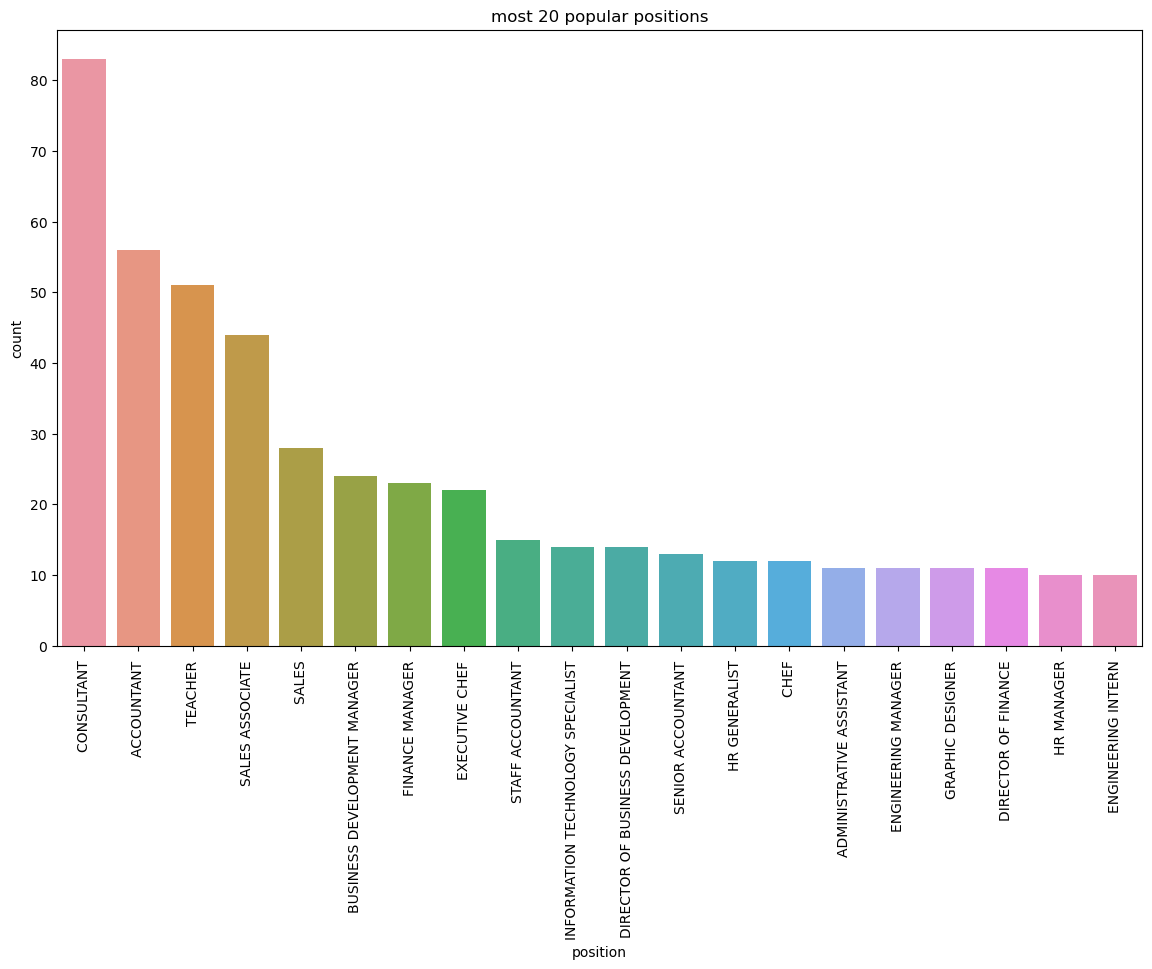

In [203]:
plt.figure(figsize=(14,8))
sns.barplot(data=highest_20_positions, x='index', y='count')
plt.xticks(rotation=90)
plt.xlabel('position')
plt.title('most 20 popular positions')
plt.show()

### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

In [205]:
df['SCHOOL_TYPE'].value_counts()

SCHOOL_TYPE
university       1733
college           428
high school       168
not mentioned     155
Name: count, dtype: int64

## The most popular school is "university", which indicate that it is good for kids' future

### <span style="color:brown">Q3:

what is the most common skills among all applications?

In [206]:
total_skills=[]
for skill in df['SKILLS']:
    skill = ' '.join(skill.split('Skills'))
    skill = skill.replace('    ', ',').replace('   ', ',').replace('  ', ',')

    skill=skill.split(',')
    skill = [i.lower().strip() for i in skill if i!='']
    total_skills.append(skill)

skills_list = [one_skill for one_list_skills in total_skills for one_skill in one_list_skills]

skills_dataframe = pd.DataFrame(data=skills_list,columns=['skills'] )
skills_dataframe.head(4)

,skills
0,accounting
1,ads
2,advertising
3,analytical skills


In [207]:
skills_dataframe.value_counts()


skills                                                 
sales                                                      676
excel                                                      605
clients                                                    504
customer service                                           494
marketing                                                  415
                                                          ... 
gimp                                                         1
gis analyst                                                  1
git-bash                                                     1
git-lab                                                      1
●process improvement & finance controls● implementation      1
Name: count, Length: 13614, dtype: int64

## The most common skill is salesm then excel an so on.

### <span style="color:brown">Q4:

Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

In [208]:
df[df['VOLUNTEERING']==1]['POSITION_TITLE'].value_counts()

POSITION_TITLE
CONSULTANT                                                                                             10
TEACHER                                                                                                 8
EXECUTIVE DIRECTOR                                                                                      5
SALES ASSOCIATE                                                                                         5
BUSINESS DEVELOPMENT MANAGER                                                                            4
                                                                                                       ..
R&D NEW PRODUCT DEVELOPMENT TECHNICIAN                                                                  1
SENIOR MEDICAL RECRUITER                                                                                1
UT-TSU AGRICULTURE / 4-H EXTENSION AGENT TRAINEE                                                        1
FELLOW: CREATING LIVELIHOODS VI

## The most active members are consultants, then teachers and so on

### <span style="color:brown">Q5:

could you nominate the best job application for each position?

In [66]:
df['POSITION_TITLE'].value_counts()

### <span style="color:brown">Q6:

Do you think learning another language could effect the application, support your opinion.

In [209]:
df['Languages'].value_counts()

Languages
0    1865
1     330
2     173
3      78
4      22
5      11
6       3
7       2
Name: count, dtype: int64

## I dont beleive so because most applicants did not mention language skills which means they dont know any other language. Just only few of them are bilingual, and very small of them know more than two languages.

## <span style="color:brown">Q7:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

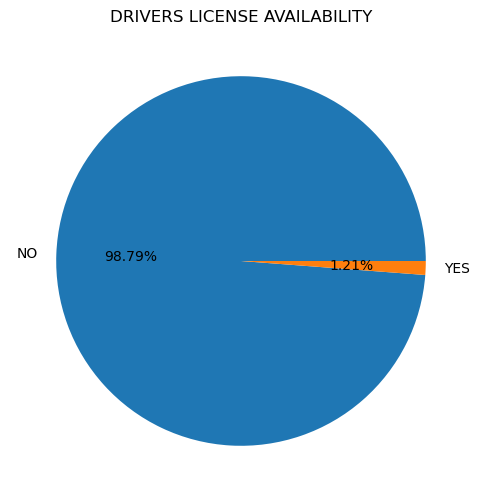

In [210]:
plt.figure(figsize=(10,6))
plt.pie(df['DRIVERS_LICENSE_AVAILABILITY'].value_counts(), labels=['NO', 'YES'], autopct="%.2f%%")
plt.title('DRIVERS LICENSE AVAILABILITY')
plt.show()

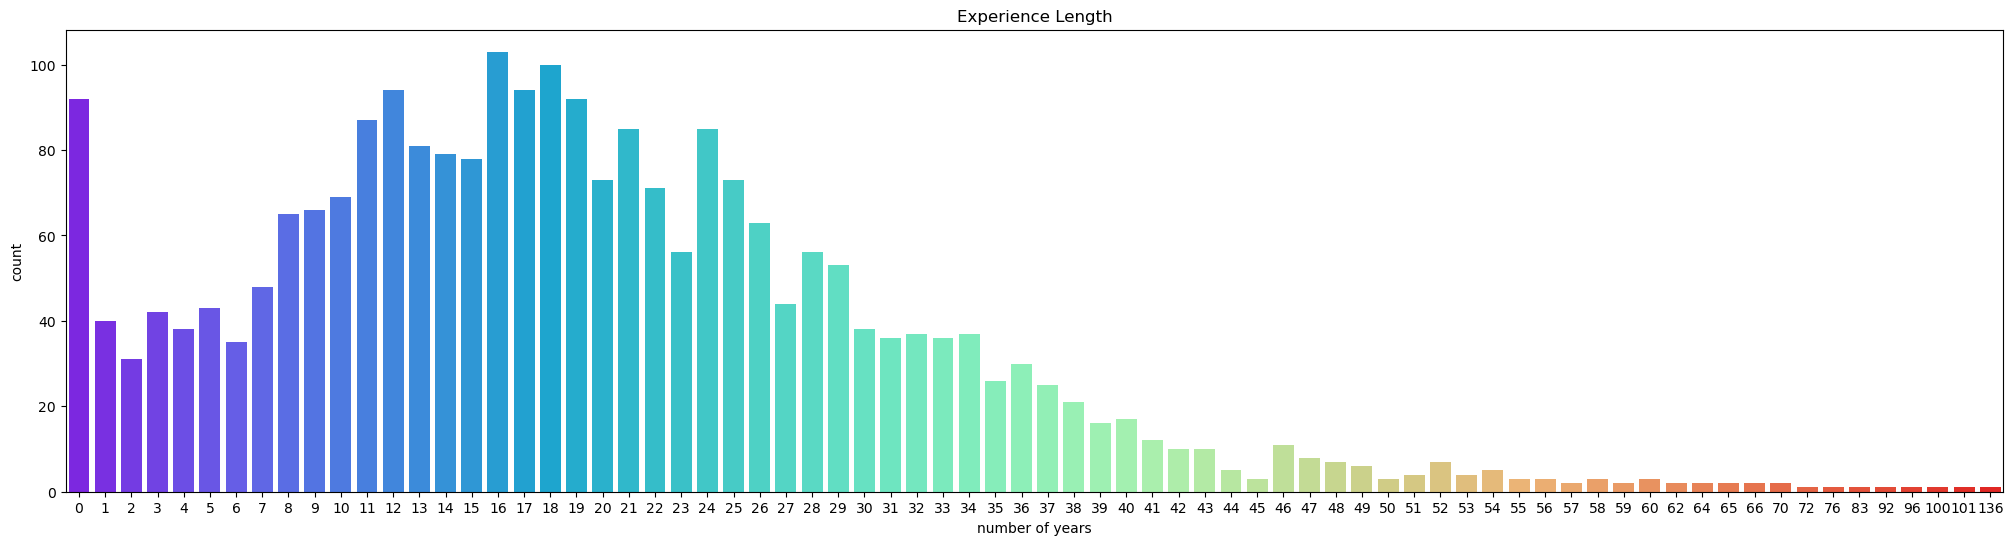

In [229]:
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='EXPERIENCE_LENGTH', palette='rainbow')
plt.title('Experience Length')
plt.xlabel('number of years')
plt.show()

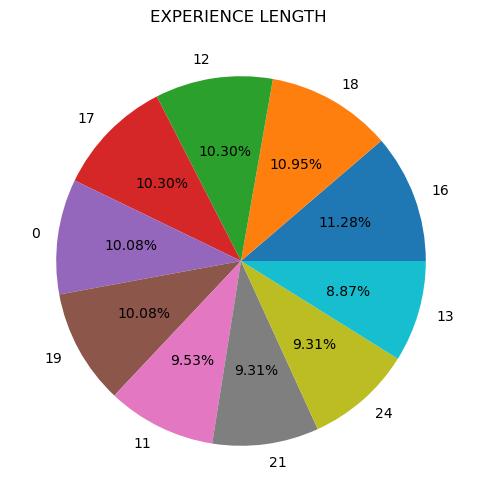

In [212]:
plt.figure(figsize=(10,6))
plt.pie(df['EXPERIENCE_LENGTH'].value_counts()[:10], labels=df['EXPERIENCE_LENGTH'].value_counts()[:10].index,  autopct="%.2f%%")
plt.title('EXPERIENCE LENGTH ')
plt.show()

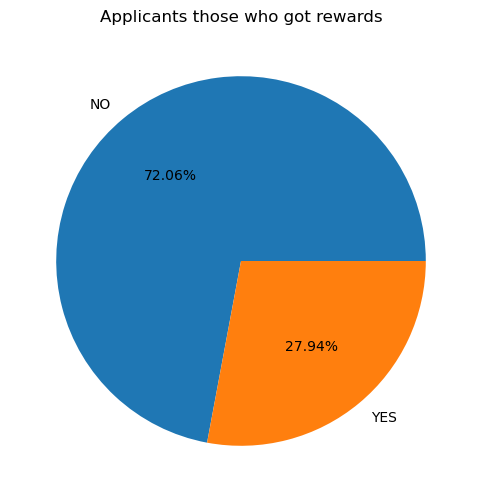

In [213]:
plt.figure(figsize=(10,6))
plt.pie(df['AWARDS'].value_counts(), labels=['NO', 'YES'], autopct="%.2f%%")
plt.title('Applicants those who got rewards')
plt.show()

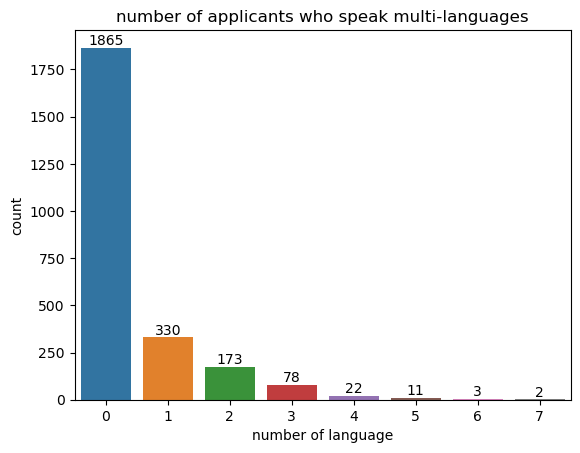

In [214]:
ax = sns.countplot(x='Languages', data=df)
ax.bar_label(ax.containers[0])
plt.title('number of applicants who speak multi-languages')
plt.xlabel('number of language')
plt.show()

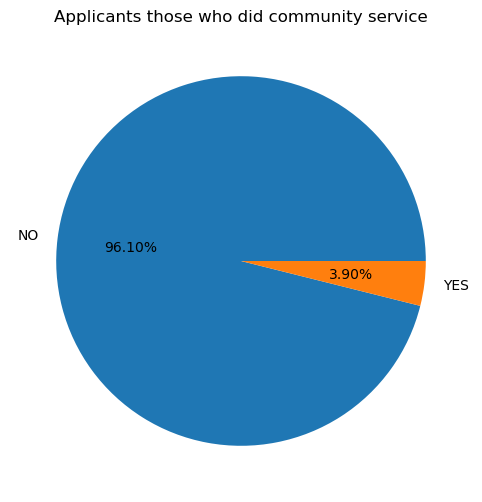

In [215]:
plt.figure(figsize=(10,6))
plt.pie(df['COMMUNITY SERVICE'].value_counts(), labels=['NO', 'YES'], autopct="%.2f%%")
plt.title('Applicants those who did community service')
plt.show()

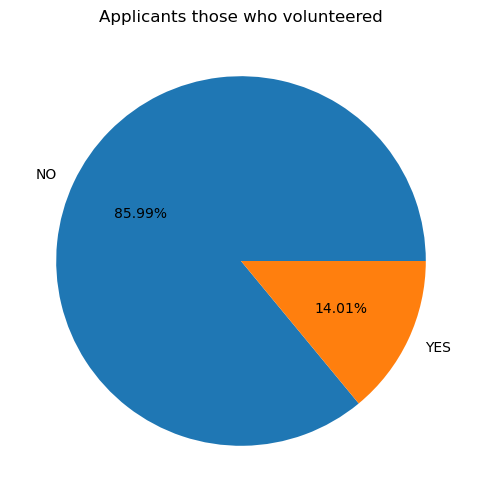

In [216]:
plt.figure(figsize=(10,6))
plt.pie(df['VOLUNTEERING'].value_counts(), labels=['NO', 'YES'], autopct="%.2f%%")
plt.title('Applicants those who volunteered')
plt.show()

## <span style="color:brown">Q8:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            2484 non-null   int64 
 1   Resume_str                    2484 non-null   object
 2   Resume_html                   2484 non-null   object
 3   Category                      2484 non-null   object
 4   POSITION_TITLE                2484 non-null   object
 5   SKILLS                        2484 non-null   object
 6   SKILLS_COUNT                  2484 non-null   int64 
 7   DRIVERS_LICENSE_AVAILABILITY  2484 non-null   int64 
 8   Languages                     2484 non-null   int64 
 9   COMMUNITY SERVICE             2484 non-null   int64 
 10  VOLUNTEERING                  2484 non-null   int64 
 11  AWARDS                        2484 non-null   int64 
 12  EXPERIENCE_LENGTH             2484 non-null   int32 
 13  SCHOOL_TYPE       

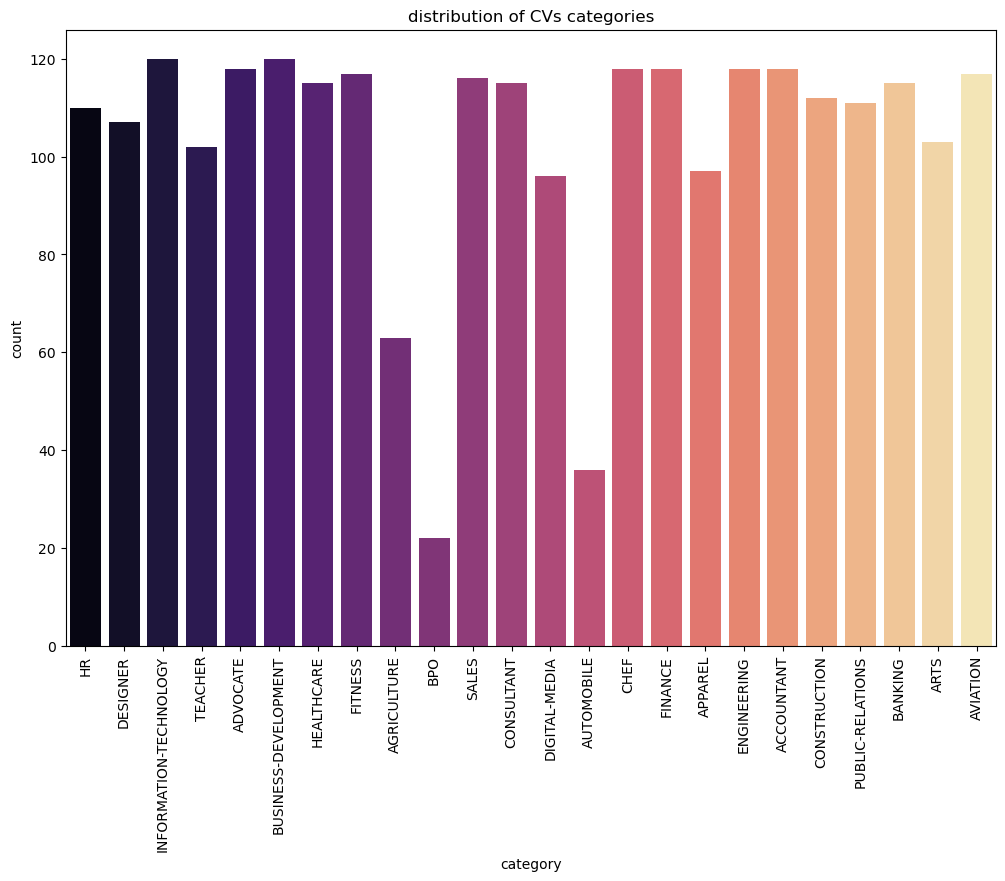

In [227]:

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Category', palette='magma')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.title('distribution of CVs categories')
plt.show()

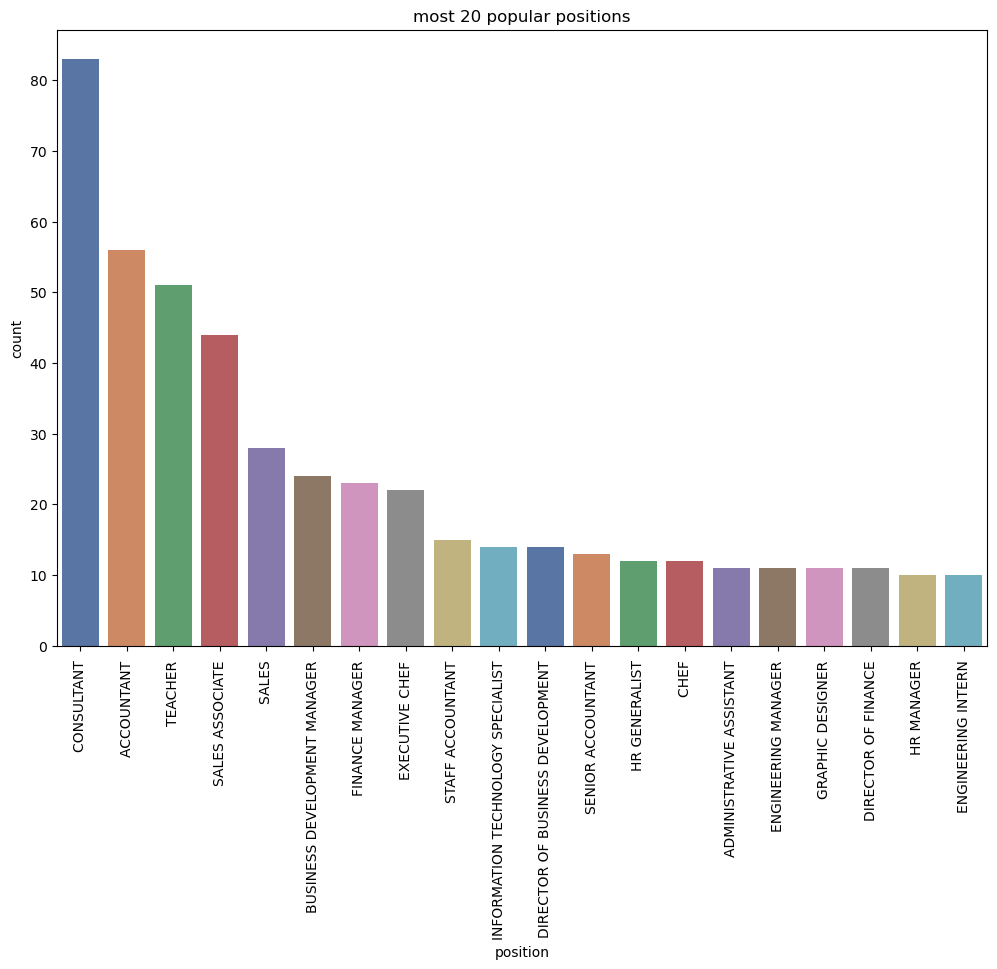

In [234]:
plt.figure(figsize=(12,8))
sns.barplot(data=highest_20_positions, x='index', y='count', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('position')
plt.title('most 20 popular positions')
plt.show()

### Mohammad Zahrawi

## Great Job.